# Data Analysis and Data Science
## Be curious about the methods

By: Caroline Labelle
<br>For: BCM6065-65

<br>
Date: July 14th 2021

<hr style="border:1px solid black"> </hr>


In [ ]:
Name: Bahareh Heidari

## Installing Python libraries

Befor using (or importing) a library in Python, you first need to install it!. This step only need to be done once for each library: once istalled, you will have access to all the libraries from your coding environment.

Ressource: https://pip.pypa.io/en/stable/user_guide/

In [5]:
### Installing scikit-learn
!pip3 install -U scikit-learn

Requirement already up-to-date: scikit-learn in ./.local/lib/python3.6/site-packages (0.24.2)
You are using pip version 18.1, however version 21.1.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
!pip3 install -U scikit-learn

In [8]:
### Import sklearn
import sklearn.decomposition
import sklearn.cluster
### Import scipy
import scipy

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.set_theme(context="notebook", style="white", palette="Set2")

We will be mainly using the <code>sklearn</code> and <code>scipy</code> libraries to implement and use various data analysis methods.

scikit-learn ressource: https://scikit-learn.org/stable/index.html
Scipy ressource: https://docs.scipy.org/doc/scipy/reference/

## Data Analysis

Once we've explored our dataset and have a better undesrtanding of what it contains, we can start to analyse it! Before applying any kind of methods, we must first establish "what we want to know".

Do we want to **fit** our data to a model and/or assess if there is a **correlation** between variables? Do we want to **decompose** our dataset and/or identify **clusters**?

Once we establish "what we want to know", we need to define "how we'll do it"! There exist different methods for a single task... We must be curious about the methods and use the one that is the most appropriate to our *context*! 

<hr>

## Regression and Curve fitting

### Linear regression with Scipy

<code>scipy.stats.linregress(x, y, alternative='two-sided')</code>

* **x, y**: sets of measurements
* **alternative='two-sided'**: the alternative hypothesis ($H_{a}$) is that the slope of the regression line is nonzero

Here, the null hypothesis ($H_{0}$) is that the slope is zero.

Ressource: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress

In [51]:
### Import the iris dataset fn:file name
fn = "iris.tsv"

In [52]:
data_iris = pd.read_csv(fn,sep="\t")
data_iris

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


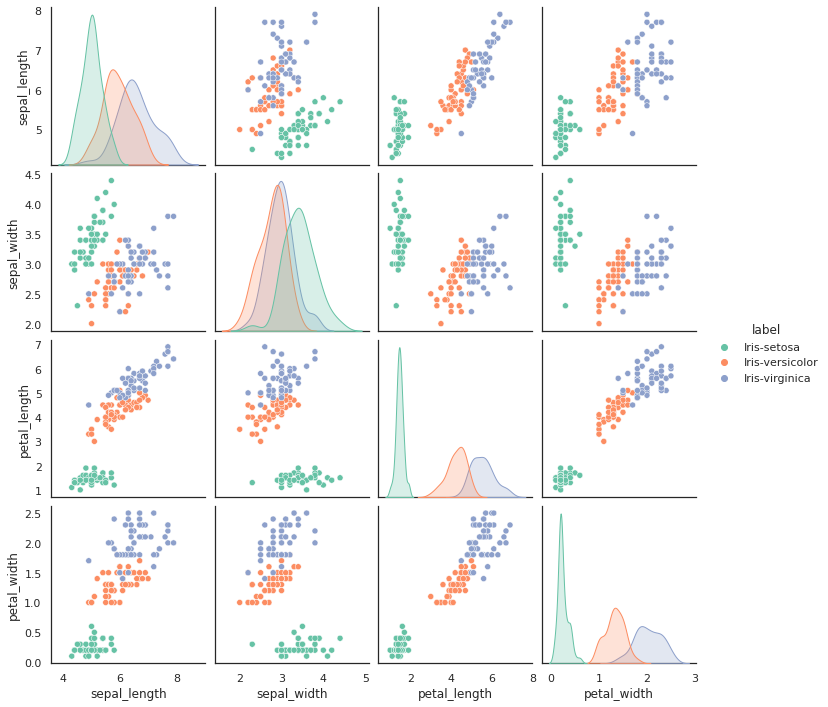

In [53]:
### Plot a pairwise comparison figure with seaborn
sns.pairplot(data_iris, hue="label")

Petal length and width seems to be highly corrolated. We want to confirm this by applying a linear regression.

In [54]:
## Do a linear regression
x= data_iris.petal_width
y= data_iris.petal_length
reg=scipy.stats.linregress(x=x, y=y)

In [55]:
## Look a the results
reg

LinregressResult(slope=2.229940495121863, intercept=1.083558032850512, rvalue=0.9628654314027962, pvalue=4.675003907326566e-86, stderr=0.05139623146514124)

In [56]:
###y=ax+b
y_own = reg.slope*x+reg.intercept

In [144]:
###rvalue
"The R coefficient is: %.3f" %  (reg.rvalue)

'The R coefficient is: 0.963'

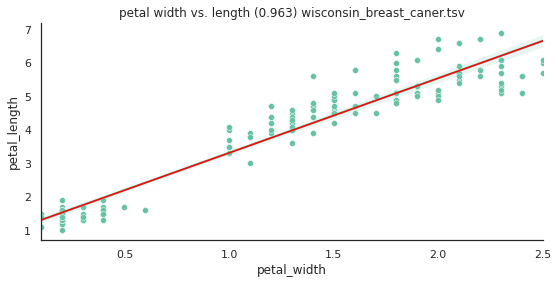

In [149]:
sns.scatterplot(x=x, y=y)
sns.regplot(x=x, y=y, scatter=False)
sns.lineplot(x=x, y=y_own, color="red")
plt.title("petal width vs. length (%.3f) %s" % (reg.rvalue, fn))
sns.despine()

The <code>rvalue</code> represents the correlation coefficient. The Pearson's correlation coefficient measures the linear relationship between two variables.

**Important**: a correlation of 0 does not imply no correlation!

<hr>

### Exercice [10 points]
Select a pair of variables (other than petal length vs. width). 
1. Apply a linear regression for each flower type;
2. Plot the datapoints and a the linear fit obtained for each flower type (you plot three plots independently).

Which flower type has the highest correlation?

# Based on the results, Setosa flowers with the highest  rvalue (0.7), have the highest correlation coefficient. However, the difference between rvalues of different types of flowers seem not to be significant.

In [619]:
### create Iris_virginica dataframe
Iris_virginica_dataframe = data_iris[data_iris["label"]=="Iris-virginica"]
Iris_virginica_dataframe.head()

,sepal_length,sepal_width,petal_length,petal_width,label
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


In [620]:
Iris_virginica_dataframe.shape

(50, 5)

In [621]:
##  linear regression for sepal width and sepal length of Iris-virginica
x= Iris_virginica_dataframe.sepal_width
y= Iris_virginica_dataframe.sepal_length
reg=scipy.stats.linregress(x=x, y=y)

In [622]:
reg

LinregressResult(slope=0.9015344766688901, intercept=3.906836466386719, rvalue=0.45722781639411275, pvalue=0.0008434624723708833, stderr=0.25310550725196024)

In [623]:
y_own = reg.slope*x+reg.intercept

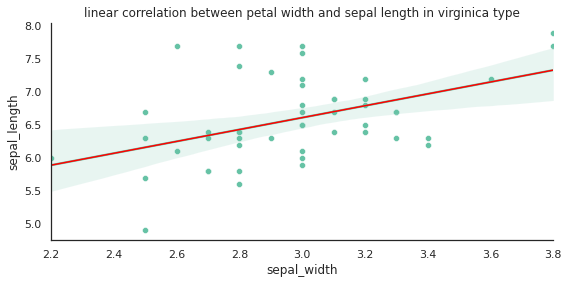

In [624]:
x= Iris_virginica_dataframe.sepal_width
y= Iris_virginica_dataframe.sepal_length
sns.scatterplot(x=x, y=y)
sns.regplot(x=x, y=y, scatter=False)
sns.lineplot(x=x, y=y_own, color="red")
plt.title("linear correlation between petal width and sepal length in virginica type")
sns.despine()

In [625]:
### create Iris versicolor dataframe
Iris_versicolor_dataframe = data_iris[data_iris["label"]=="Iris-versicolor"]
Iris_versicolor_dataframe.head()

,sepal_length,sepal_width,petal_length,petal_width,label
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [626]:
##  linear regression for sepal width anf length of Iris-versicolor
x= Iris_versicolor_dataframe.sepal_width
y= Iris_versicolor_dataframe.sepal_length
reg=scipy.stats.linregress(x=x, y=y)

In [627]:
reg

LinregressResult(slope=0.8650777202072538, intercept=3.5397347150259066, rvalue=0.5259107172828246, pvalue=8.77186001197382e-05, stderr=0.2019375661891724)

In [628]:
y_own = reg.slope*x+reg.intercept

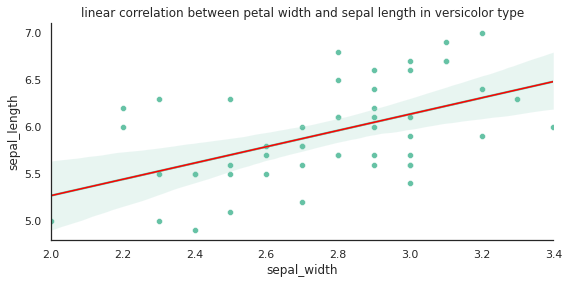

In [629]:
x= Iris_versicolor_dataframe.sepal_width
y= Iris_versicolor_dataframe.sepal_length
sns.scatterplot(x=x, y=y)
sns.regplot(x=x, y=y, scatter=False)
sns.lineplot(x=x, y=y_own, color="red")
plt.title("linear correlation between petal width and sepal length in versicolor type")
sns.despine()

In [630]:
### create Iris setosa dataframe
Iris_setosa_dataframe = data_iris[data_iris["label"]=="Iris-setosa"]
Iris_setosa_dataframe.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [631]:
##  linear regression for sepal width anf length of Iris-setosa
x= Iris_setosa_dataframe.sepal_width
y= Iris_setosa_dataframe.sepal_length
reg=scipy.stats.linregress(x=x, y=y)

In [632]:
reg

LinregressResult(slope=0.6904897170776048, intercept=2.639001249857971, rvalue=0.7425466856651597, pvalue=6.709843017660536e-10, stderr=0.08989888130600565)

In [633]:
y_own = reg.slope*x+reg.intercept

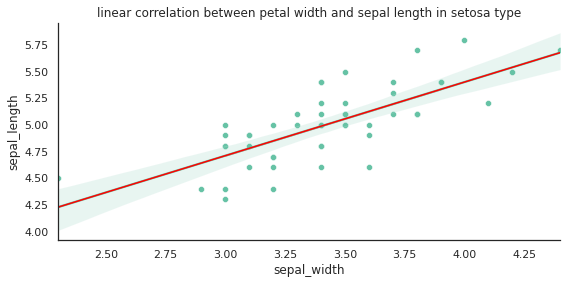

In [634]:
x= Iris_setosa_dataframe.sepal_width
y= Iris_setosa_dataframe.sepal_length
sns.scatterplot(x=x, y=y)
sns.regplot(x=x, y=y, scatter=False)
sns.lineplot(x=x, y=y_own, color="red")
plt.title("linear correlation between petal width and sepal length in setosa type")
sns.despine()

### Curve fitting with Scipy

<code>scipy.optimize.curve_fit(f, x, y)</code>

* **f**: model function such that $f(x, ...)$
* **x, y**: sets of measurements


Ressource: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit

In [59]:
### Linear of regression with curve_fit
### Define the model f, definition of an equation
def f_linear(x, A, B):
    y = A*x + B
    return y

In [60]:
f_linear(1,1,1)

2

In [61]:
### Do linear curve fitting of petal length vs. petal width
x_iris = data_iris.petal_width
y_iris = data_iris.petal_length
param, cov = scipy.optimize.curve_fit(f_linear, x, y)

In [62]:
### Look at results and compare to linregress results
### Param: 2.2=A, 1.08=B
param

### R Coef:

array([2.22994049, 1.08355803])

In [63]:
cov

array([[ 0.00264157, -0.00316813],
       [-0.00316813,  0.00532418]])

In [64]:
### Look at results and compare to linregress results
### Param: 2.2=A, 1.08=B
param

### R Coef: its a matrix
np.corrcoef(x_iris, y_iris)

array([[1.        , 0.96286543],
       [0.96286543, 1.        ]])

<code>numpy.corrcoef()</code> returns the Peasron correlation coefficient matrix of the variables.

Ressource: https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html

### Exercice [20 points]
Import the dose-response dataset. We tested various concentrations for 12 different drugs on AML3 cells. The dataset contains the viability responses. 

* Row names are the $log_{10}$ concentration
* Column names are the various drugs we tested
* Cells values are the $\%$ viability of AML3 for a given concentration of a given compound.


**Find which drug has the smallest IC$_{50}$ and which drug has the smallest minimal viabiality.**

It is common practice to model dose-response data with the log-logistic model:<br>
$$f(x) = Min + \frac{Max - Min}{1 + 10 ^ {slope\cdot (x - IC_{50})}} $$<br>

where $x$ is a dose and $f(x)$ the $\%$ viability for that given dose.

# Based on the results, MI-2 has the smallest IC50 (1.95), and Erlotinib has the smallest minimal viability (4.79%).

In [341]:
### min A, max B, IC50 D,Slope C, IC50 D
fn = "dose_response.tsv"


In [342]:
myDataFrame = pd.read_csv(fn,sep="\t", index_col=0)
myDataFrame

,17-AAG,5-FU,Cisplatin,Docetaxel,Erlotinib,Gemcitabine,Methotrexate,Paclitaxel,Dasatinib,Erastin,MI-2,Ibrutinib
0.00,105.365642,104.596167,101.129574,104.611240,100.827837,97.771030,99.892151,103.443733,98.183534,109.187630,93.403644,105.657292
0.45,101.565216,101.134757,112.224370,92.524450,98.901574,95.908113,92.199586,98.159898,96.205833,103.643503,94.823219,94.071434
0.90,100.033307,105.314506,97.311008,100.129630,111.514098,94.009943,92.336612,90.819773,102.504385,99.907917,89.138794,98.583086
1.35,103.455431,93.823001,102.715153,80.514468,104.753194,89.887212,95.716763,94.277135,92.090233,95.876338,81.162379,109.049417
1.80,93.130203,94.981719,94.863502,94.301608,98.597278,79.484431,92.782509,94.042318,90.970364,87.460870,71.377037,97.239645
2.25,103.093430,64.110867,90.996261,80.036030,86.086095,59.138391,75.734292,74.128078,75.929157,73.015530,50.435617,92.149005
2.70,87.028302,61.643406,69.525899,52.829233,80.520431,34.964451,56.214709,58.924878,62.486050,37.546302,45.091421,92.256527
3.15,50.764615,46.417025,53.749364,43.116768,58.411053,27.628352,36.510491,42.976436,40.625998,27.237694,39.347083,73.819412
3.60,45.467911,25.964098,34.647526,32.616712,27.025940,36.939511,24.535577,36.424704,12.372163,30.730914,30.965974,39.923958
4.05,26.872119,17.467186,33.464696,19.563055,16.294061,19.586942,23.806342,27.073710,19.433530,21.001223,34.102808,22.724323


In [337]:
### 4^2=16
np.power (4, 2)

16

In [338]:
"np.power(10, slope*(x-IC50))"

'np.power(10, slope*(x-IC50))'

In [472]:
def new_equation (x, Min, Max, slope, IC50):
    y= Min + ((Max-Min) / (1. + np.power(10. ,slope*(x-IC50))))
    return y

In [473]:
x =myDataFrame.index.values
y= myDataFrame["17-AAG"]
param, cov = scipy.optimize.curve_fit(new_equation, x, y)

In [474]:
param

array([  7.89764137, 103.3838195 ,   0.9420016 ,   3.28339625])

In [278]:
x =myDataFrame.index.values
y= myDataFrame["5-FU"]
param, cov = scipy.optimize.curve_fit(new_equation, x, y)

In [279]:
param

array([ 14.88155558, 105.61245252,   0.75436178,   2.62766514])

In [285]:
x =myDataFrame.index.values
y= myDataFrame["Cisplatin"]
param, cov = scipy.optimize.curve_fit(new_equation, x, y)

In [286]:
param

array([ 14.35944684, 105.4806414 ,   0.77636878,   3.00484284])

In [287]:
x =myDataFrame.index.values
y= myDataFrame["Docetaxel"]
param, cov = scipy.optimize.curve_fit(new_equation, x, y)

In [288]:
param

array([15.16757391, 98.54306516,  0.83310979,  2.75875416])

In [289]:
x =myDataFrame.index.values
y= myDataFrame["Erlotinib"]
param, cov = scipy.optimize.curve_fit(new_equation, x, y)

In [290]:
param

array([  4.79872146, 103.51792186,   0.99900279,   3.16196962])

In [291]:
x =myDataFrame.index.values
y= myDataFrame["Gemcitabine"]
param, cov = scipy.optimize.curve_fit(new_equation, x, y)

In [292]:
param

array([22.35010927, 97.15086788,  1.1381718 ,  2.21671977])

In [294]:
x =myDataFrame.index.values
y= myDataFrame["Methotrexate"]
param, cov = scipy.optimize.curve_fit(new_equation, x, y)

In [295]:
param

array([17.1456257 , 96.38756907,  1.11018574,  2.70117736])

In [296]:
x =myDataFrame.index.values
y= myDataFrame["Paclitaxel"]
param, cov = scipy.optimize.curve_fit(new_equation, x, y)

In [297]:
param

array([ 19.95153296, 100.31717753,   0.79285873,   2.70866825])

In [298]:
x =myDataFrame.index.values
y= myDataFrame["Dasatinib"]
param, cov = scipy.optimize.curve_fit(new_equation, x, y)

In [299]:
param

array([15.12526209, 97.4934386 ,  1.15105572,  2.75150664])

In [300]:
x =myDataFrame.index.values
y= myDataFrame["Erastin"]
param, cov = scipy.optimize.curve_fit(new_equation, x, y)

In [301]:
param

array([ 22.11417513, 103.7552015 ,   1.28306128,   2.32509716])

In [302]:
x =myDataFrame.index.values
y= myDataFrame["MI-2"]
param, cov = scipy.optimize.curve_fit(new_equation, x, y)

In [303]:
param

array([31.79391242, 95.91467095,  0.89697179,  1.95658472])

In [304]:
x =myDataFrame.index.values
y= myDataFrame["Ibrutinib"]
param, cov = scipy.optimize.curve_fit(new_equation, x, y)

In [305]:
param

array([ 11.65227726, 100.21266751,   1.3875885 ,   3.39071031])

### BONUS [5 points]
**Is there a linear correlation between the IC50 and Min values?**


# Based on the calculated correlation coefficient (rvalue: 0.9) and the small pvalue (8e-08), we can reject H0 hypothesis and conclude that there is a significant correlation between IC50 and Min values. 

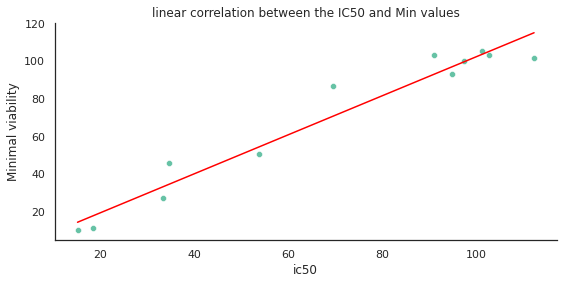

In [497]:
IC50 = myDataFrame.iloc[:,2]
minimal_value = myDataFrame.iloc[:,0]

sns.scatterplot(x=ic50,y=minimal_value)
reg = scipy.stats.linregress(x=ic50, y=minimal_value)
y_own = reg.slope*ic50 + reg.intercept 
sns.lineplot(x=ic50, y=y_own, color="red")

plt.title("linear correlation between the IC50 and Min values")
plt.xlabel("ic50")
plt.ylabel("Minimal viability")
sns.despine()


In [467]:
x= IC50
y= minimal_value
reg=scipy.stats.linregress(x=x, y=y)

In [468]:
reg

LinregressResult(slope=1.0415297908737986, intercept=-1.7437328899286229, rvalue=0.9745384761410646, pvalue=8.075194178959696e-08, stderr=0.0757787963674149)

<hr>

## Dimensionality reduction

Dimensionality reduction allows use to reduce th enumber of random variables to consider. It is primarly useful for visualisation purpose and to increase the efficiency of other analysis methods (eg. clustering).

### PCA with scikit learn

**PCA** = Principal Component Analysis

PCA is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. *We are trading a little bit of accuracy for simplicity*.

Ressource: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

In [67]:
### Show the iris dataset
data_iris

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [68]:
### Define the data we need for the PCA
sol_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
X = data_iris.iloc[:,0:4]

In [70]:
### Initiate de PCA and apply it to our data
pca = sklearn.decomposition.PCA()
pca.fit(X)

PCA()

Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components.

**Attributes of the pca object:**

<code>pca.n_components_</code>: estimated number of components

<code>pca.n_features_</code>: number of features in the training data

<code>pca.n_samples_</code>: number of samples in the training data

In [ ]:
## Get estimated number of components
pca.n_components_

In [ ]:
## Get number of features in the training data


In [ ]:
## Get number of samples in the training data


PCA tries to put maximum possible information in the first component, then maximum remaining information in the second and so on.

<code>pca.explained_variance_</code>: amount of variance explained by each of the selected components

<code>pca.explained_variance_ratio_</code>: Percentage of variance explained by each of the selected components.

In [71]:
## Get the explained_variance
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [72]:
## Get the explained_variance_ratio_
## What do you notice?
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [74]:
np.arange(0, 5)

array([0, 1, 2, 3, 4])

Text(0, 0.5, '%of explained variance')

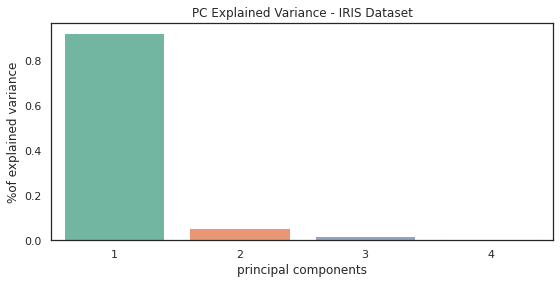

In [76]:
## Plot the explained_variance_ratio_
## Bar plot: https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x=np.arange(1,5), y=pca.explained_variance_ratio_)
plt.title("PC Explained Variance - IRIS Dataset")
plt.xlabel("principal components")
plt.ylabel("%of explained variance")

In [86]:
### Apply the dimensionality reduction to our data ###it shows just variance
reduce_iris = pca.transform(X)

### Make a dataframe and add the label column
reduce_iris = pd.DataFrame(reduce_iris)
reduce_iris["label"] = data_iris.label


In [85]:
reduce_iris.head()

,0,1,2,3,label
0,-2.684126,0.319397,-0.027915,-0.002262,Iris-setosa
1,-2.714142,-0.177001,-0.210464,-0.099027,Iris-setosa
2,-2.888991,-0.144949,0.017900,-0.019968,Iris-setosa
3,-2.745343,-0.318299,0.031559,0.075576,Iris-setosa
4,-2.728717,0.326755,0.090079,0.061259,Iris-setosa


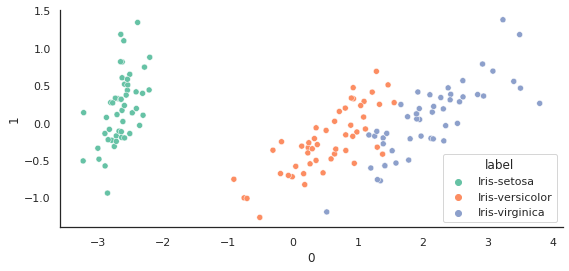

In [88]:
### Plot the results of the reduction
### How many PC should we use?
sns.scatterplot(data=reduce_iris, x=0, y=1, hue="label")
sns.despine()

What can be said of the above plot?

Remember, the principal components are less interpretable and don’t have any real meaning since they are constructed as linear combinations of the initial variables...

### Other ressources to learn more about PCA
* https://builtin.com/data-science/step-step-explanation-principal-component-analysis
* https://www.youtube.com/watch?v=HMOI_lkzW08
* https://www.youtube.com/watch?v=FgakZw6K1QQ

### Exercice  [20 points]

Import the Wisconsin breast cancer dataset. We are interested in identifying tumors types.

Can you identify a pair of variables that seems to be linearly correlated? 
* **What is the r coefficient?** 
* **Do you find different r coefficient for the different tumors type?**

Apply a PCA on the dataset. Make sur to plot the percent of explained variance, and the results of the reduction apply to data.
* **What can you conclude regarding the tumors types?**

# radius and perimeter (rvalue:0.99) has the highest correlation and also there is a correlation between smoothness and symmetry (rvalue:0.55)



In [9]:
fn = "wisconsin_breast_caner.tsv"

In [10]:

df = pd.read_csv(fn,sep="\t")
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,Tumors type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,malignant
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,malignant


In [11]:
x= df["mean smoothness"]
y= df["mean symmetry"]
reg=scipy.stats.linregress(x=x, y=y)

In [12]:
reg

LinregressResult(slope=1.0872337632801994, intercept=0.07639571176293489, rvalue=0.5577747880728872, pvalue=7.795252788420366e-48, stderr=0.0679432952047062)

In [13]:
y_own = reg.slope*x+reg.intercept

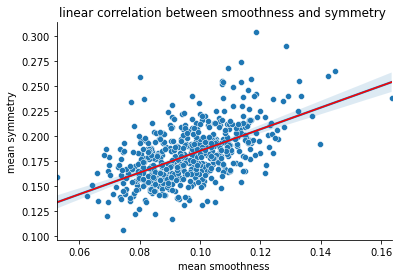

In [14]:
x= df["mean smoothness"]
y= df["mean symmetry"]
sns.scatterplot(x=x, y=y)
sns.regplot(x=x, y=y, scatter=False)
sns.lineplot(x=x, y=y_own, color="red")
plt.title("linear correlation between smoothness and symmetry ")
sns.despine()

In [15]:
(reg.rvalue)

0.5577747880728872

In [16]:
x= df["mean radius"]
y= df["mean perimeter"]
reg=scipy.stats.linregress(x=x, y=y)

In [17]:
reg

LinregressResult(slope=6.880400289601543, intercept=-5.232388786540312, rvalue=0.9978552814938111, pvalue=0.0, stderr=0.01895491225407212)

In [18]:
y_own = reg.slope*x+reg.intercept

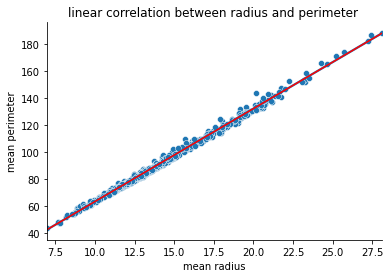

In [19]:
x= df["mean radius"]
y= df["mean perimeter"]
sns.scatterplot(x=x, y=y)
sns.regplot(x=x, y=y, scatter=False)
sns.lineplot(x=x, y=y_own, color="red")
plt.title("linear correlation between radius and perimeter ")
sns.despine()

In [20]:
(reg.rvalue)

0.9978552814938111

# rvalues (correlation coefficient) between smoothness and symmetry for malignant tumors and benign tumors are 0.57 and 0.45, respectively. So, there is a difference between rvalues of different types of tumor. However, it could be by chance. (pvalue for this difference should be considered.)

In [21]:
df_malignant = df[df["Tumors type"]=="malignant"]
df_malignant.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,Tumors type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,malignant


In [22]:
x= df_malignant["mean smoothness"]
y= df_malignant["mean symmetry"]
reg=scipy.stats.linregress(x=x, y=y)

In [23]:
reg

LinregressResult(slope=1.2674877124699644, intercept=0.062486389839991496, rvalue=0.5782158728908168, pvalue=2.607248376521611e-20, stderr=0.12341627107282203)

In [24]:
df_benign = df[df["Tumors type"]=="benign"]
df_benign.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,Tumors type
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,benign
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,benign
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,benign
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,benign
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,benign


In [25]:
x= df_benign["mean smoothness"]
y= df_benign["mean symmetry"]
reg=scipy.stats.linregress(x=x, y=y)

In [26]:
reg

LinregressResult(slope=0.834084178807458, intercept=0.09705185209265432, rvalue=0.4521010071010418, pvalue=2.190014843223213e-19, stderr=0.08733913709774321)

# PCA

In [27]:
sol_names = ["mean radius", "mean texture", "mean perimeter", "mean area", "mean smoothness", "mean concavity", "mean concave points", "mean symmetry", "mean fractal dimension"] 
X = df.iloc[:,0:10]

In [28]:
pca = sklearn.decomposition.PCA()
pca.fit(X)

PCA()

In [29]:
pca.explained_variance_ratio_

array([9.99737595e-01, 1.41922412e-04, 1.20048703e-04, 4.17947339e-07,
       8.76235088e-09, 4.05324283e-09, 1.80367612e-09, 9.19912265e-10,
       3.63148200e-10, 6.02093281e-11])

Text(0, 0.5, '%of explained variance')

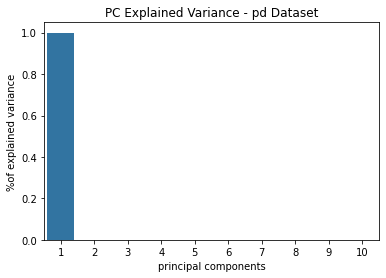

In [30]:
sns.barplot(x=np.arange(1,11), y=pca.explained_variance_ratio_)
plt.title("PC Explained Variance - pd Dataset")
plt.xlabel("principal components")
plt.ylabel("%of explained variance")

In [31]:
reduce_df = pca.transform(X)

In [32]:
reduce_df = pd.DataFrame(reduce_df)
reduce_df["Tumors type"] = df["Tumors type"]


In [33]:
reduce_df.head()

,0,1,2,3,4,5,6,7,8,9,Tumors type
0,347.389726,3.450288,-12.076318,0.572098,0.032811,0.004913,0.007703,0.012064,0.013334,0.000154,malignant
1,672.360671,6.224454,1.098863,-0.416321,0.018808,0.023959,0.004654,0.012693,0.001331,0.005677,malignant
2,549.459902,-0.291601,-0.666707,-0.040560,0.047130,0.013785,0.008920,-0.011776,0.011583,-0.001717,malignant
3,-269.152753,-4.105000,-1.669007,0.598816,0.096022,0.037024,0.052045,0.015608,0.003036,0.004198,malignant
4,643.562714,6.209533,-4.199133,0.134655,-0.023151,-0.020709,-0.023839,-0.008362,-0.004567,0.001980,malignant


In [34]:
reduce_df.shape

(569, 11)

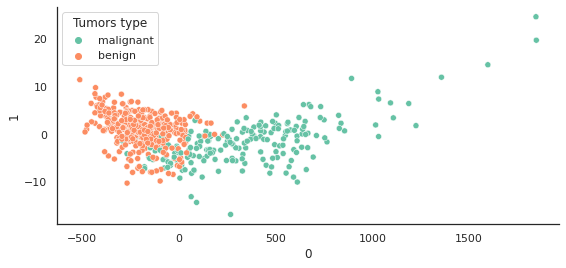

In [416]:
sns.scatterplot(data= reduce_df, x=0, y=1, 
sns.despine()

<hr>

## Clustering

Clustering methodologies allow us to automatically group similar object into sets. There exist many clustering methodologies!

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

### k-means with scikit-learn

The KMeans algorithm clusters data by trying to separate samples in $n$ groups of equal variance, minimizing a criterion known as **within-cluster sum-of-squares**.

This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

At a glance, the k-means algorithm divides a set of $N$ samples $X$ into $K$ disjoint clusters $C$, each described by the mean $\mu_{j}$ of the samples in the cluster $C_{j}$. 

*In very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.*

Ressource: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

Let's apply the k-means algorithm to the first two principal component of the Iris dataset. **Are we able to cluster the datapoint based on their flower type?**

In [121]:
### Define the data
sol_names = ["mean radius", "mean texture", "mean perimeter", "mean area", "mean smoothness", "mean concavity", "mean concave points", "mean symmetry", "mean fractal dimension"] 
X = reduce_iris.iloc[:, 0:4]

In [122]:
### Initiate the k-means alogirthm
### How many cluster should we use? HERE, K IS BASED ON LABELS
k = 3

In [135]:
### Apply kmeans to our data
kmeans= sklearn.cluster.KMeans(k)
kmeans = kmeans.fit(X)

**Attributes of the kmeans object:**

<code>kmeans.cluster_centers_</code>: coordinates of cluster centers

<code>kmeans.labels_</code>: labels of each point

In [124]:
### Get centroids coordinate
kmeans.cluster_centers_

array([[ 6.75662290e-01, -3.15204772e-01, -4.21730223e-02,
         1.10361570e-02],
       [-2.64241546e+00,  1.90885047e-01,  1.35812812e-02,
        -5.44928771e-04],
       [ 2.37446608e+00,  2.63116935e-01,  5.09385084e-02,
        -1.72893500e-02]])

In [125]:
### Get datapoints labels
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [131]:
### Add the cluster column
reduce_iris ["cluster"] = kmeans.labels_
reduce_iris

,0,1,2,3,label,cluster
0,-2.684126,0.319397,-0.027915,-0.002262,Iris-setosa,1
1,-2.714142,-0.177001,-0.210464,-0.099027,Iris-setosa,1
2,-2.888991,-0.144949,0.017900,-0.019968,Iris-setosa,1
3,-2.745343,-0.318299,0.031559,0.075576,Iris-setosa,1
4,-2.728717,0.326755,0.090079,0.061259,Iris-setosa,1
...,...,...,...,...,...,...
145,1.944110,0.187532,0.177825,-0.426196,Iris-virginica,2
146,1.527167,-0.375317,-0.121898,-0.254367,Iris-virginica,0
147,1.764346,0.078859,0.130482,-0.137001,Iris-virginica,2
148,1.900942,0.116628,0.723252,-0.044595,Iris-virginica,2


<AxesSubplot:xlabel='0', ylabel='1'>

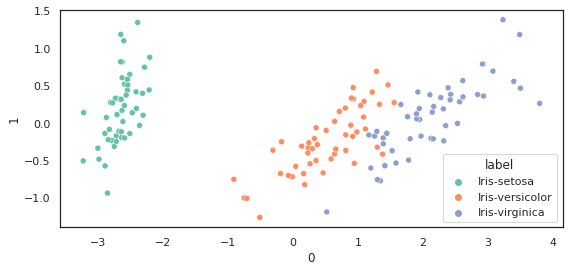

In [129]:
### Plot the cluster and the labels
sns.scatterplot(data=reduce_iris, x=0,y=1, hue="label")

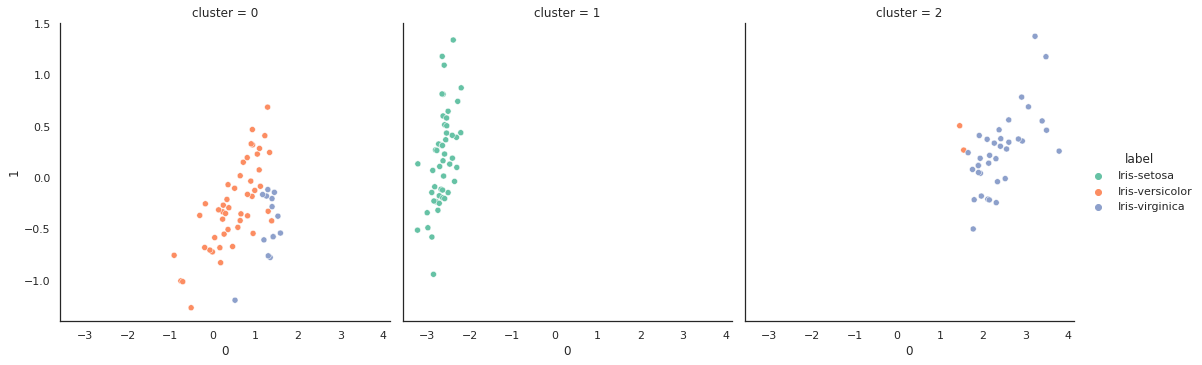

In [142]:
sns.relplot(data=reduce_iris, x=0,y=1, hue="label", col="cluster")

It is not always easy to define the number of cluster to use!

The most common approach for deciding the value of $K$ is the so-called elbow method. It involves running the algorithm multiple times over a loop, with an increasing number of cluster choice and then plotting a clustering score as a function of the number of clusters.

<code>inertia_</code>: sum of squared distances of samples to their closest cluster center

In [133]:
### Get the inertia of our initial kmean
kmeans.inertia_

78.85144142614604

In [139]:
### Run kmeans for various k values
### initiate empty list
inertia_list = []

### Create for loop for K from 1 to 10
for k in range(1, 11):
    kmeans=sklearn.cluster.KMeans(k)
    kmeans=kmeans.fit(X)
    inertia_list +=[kmeans.inertia_]

In [140]:
inertia_list

[681.3705999999997,
 152.34795176035806,
 78.85144142614604,
 57.25600931571816,
 46.44618205128206,
 39.058459040959065,
 34.421674242424245,
 30.411572738664848,
 28.075244176618032,
 26.418532780694292]

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

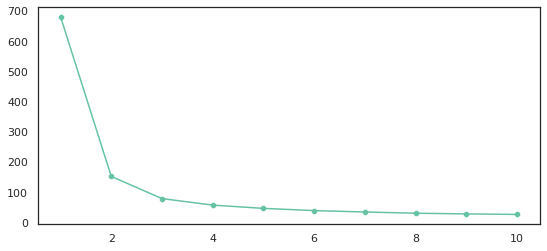

In [141]:
### Plot K vs. interti
sns.scatterplot(x=np.arange(1, 11), y=inertia_list)
sns.lineplot(x=np.arange(1, 11), y=inertia_list)
sns.despine

In [ ]:
### Plot the cluster and the labels


### Exercice [10 points]

Go back the Wisconsin breast cancer dataset. **Can you cluster the datapoint in $K$ clusters?**

You must first decide which value to give $K$. Make sure to leave some trace of your tought process...<br>
Apply the kmean algorithme to the data and plot the results. **Can you find a link between one of the dataset features and the clusters?**

In [437]:
### how many tumors type we have
### cluster data based on the tumors type
len(pd.unique(df["Tumors type"]))

2

In [452]:
K = 2

In [453]:
kmeans= sklearn.cluster.KMeans(k)
kmeans = kmeans.fit(X)

In [454]:
kmeans.cluster_centers_

array([[ 6.80871562e+02,  5.04716262e-02],
       [-2.33465255e+02,  7.47761546e-01],
       [ 3.08989656e+02, -2.01057847e+00],
       [ 1.09777763e+03,  5.96681880e+00],
       [ 1.09895072e+01, -2.02225564e+00],
       [-3.74681554e+02,  3.19882879e+00],
       [ 1.76412804e+03,  1.96750693e+01],
       [-1.11541606e+02, -7.08434085e-01],
       [ 4.95106192e+02, -1.33688997e+00],
       [ 1.36444168e+02, -2.74441427e+00]])

In [455]:
kmeans.labels_

array([2, 0, 8, 1, 0, 1, 2, 7, 7, 1, 9, 9, 8, 9, 7, 4, 4, 9, 0, 7, 7, 5,
       4, 0, 2, 2, 4, 8, 9, 2, 8, 1, 2, 8, 9, 9, 4, 7, 4, 7, 7, 1, 8, 7,
       7, 8, 5, 7, 1, 7, 1, 7, 1, 2, 4, 1, 8, 4, 7, 5, 5, 5, 4, 5, 7, 4,
       5, 1, 5, 7, 8, 5, 2, 7, 1, 9, 7, 2, 0, 7, 1, 7, 3, 8, 1, 8, 4, 8,
       1, 4, 4, 9, 7, 7, 4, 0, 1, 5, 1, 4, 7, 5, 1, 5, 5, 7, 1, 1, 0, 1,
       5, 1, 4, 5, 5, 1, 5, 4, 9, 2, 1, 8, 3, 4, 7, 7, 7, 8, 4, 8, 1, 9,
       9, 9, 8, 7, 1, 1, 4, 1, 5, 9, 1, 7, 1, 1, 1, 4, 4, 7, 7, 5, 5, 1,
       7, 1, 2, 2, 1, 1, 1, 8, 8, 1, 3, 4, 1, 2, 2, 4, 1, 7, 9, 1, 5, 5,
       5, 9, 7, 7, 6, 0, 9, 1, 4, 5, 2, 1, 1, 1, 4, 7, 5, 1, 4, 7, 7, 2,
       8, 4, 1, 2, 3, 7, 1, 4, 5, 2, 7, 4, 0, 1, 6, 2, 4, 7, 1, 5, 8, 8,
       7, 7, 5, 9, 7, 4, 5, 4, 7, 7, 2, 1, 1, 0, 5, 7, 3, 0, 4, 2, 7, 1,
       1, 7, 8, 5, 7, 7, 5, 1, 0, 1, 8, 2, 8, 7, 8, 4, 9, 9, 0, 2, 2, 9,
       2, 0, 5, 7, 7, 5, 4, 1, 0, 5, 2, 1, 1, 8, 7, 7, 8, 1, 8, 9, 7, 7,
       1, 7, 1, 1, 4, 4, 7, 1, 7, 7, 1, 1, 4, 5, 8,

In [449]:
reduce_df ["cluster"] = kmeans.labels_
reduce_df

,0,1,2,3,4,5,6,7,8,9,Tumors type,cluster
0,347.389726,3.450288,-12.076318,0.572098,0.032811,0.004913,0.007703,0.012064,0.013334,0.000154,malignant,4
1,672.360671,6.224454,1.098863,-0.416321,0.018808,0.023959,0.004654,0.012693,0.001331,0.005677,malignant,5
2,549.459902,-0.291601,-0.666707,-0.040560,0.047130,0.013785,0.008920,-0.011776,0.011583,-0.001717,malignant,1
3,-269.152753,-4.105000,-1.669007,0.598816,0.096022,0.037024,0.052045,0.015608,0.003036,0.004198,malignant,2
4,643.562714,6.209533,-4.199133,0.134655,-0.023151,-0.020709,-0.023839,-0.008362,-0.004567,0.001980,malignant,5
...,...,...,...,...,...,...,...,...,...,...,...,...
564,825.644625,3.957978,4.694108,-0.061644,0.067312,-0.030495,-0.006287,-0.028166,0.001199,0.000728,malignant,5
565,607.435813,-3.842099,5.717575,-0.305084,0.033193,0.003257,0.007683,-0.010346,0.002635,0.001456,malignant,5
566,203.898286,-7.801763,3.056188,-0.186346,-0.020818,-0.011886,0.002101,0.003580,-0.000068,-0.000239,malignant,7
567,612.040133,-10.066262,-0.301608,0.406645,0.053189,0.000613,0.001146,0.013286,-0.002575,-0.004007,malignant,5


<AxesSubplot:xlabel='0', ylabel='1'>

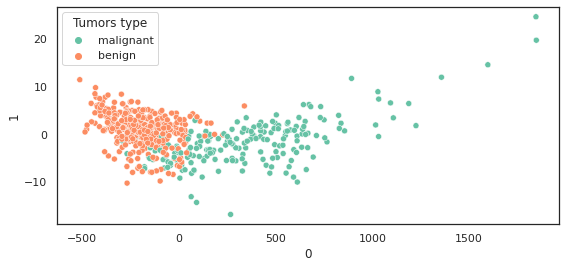

In [450]:
sns.scatterplot(data=reduce_df, x=0,y=1, hue=reduce_df["Tumors type"])

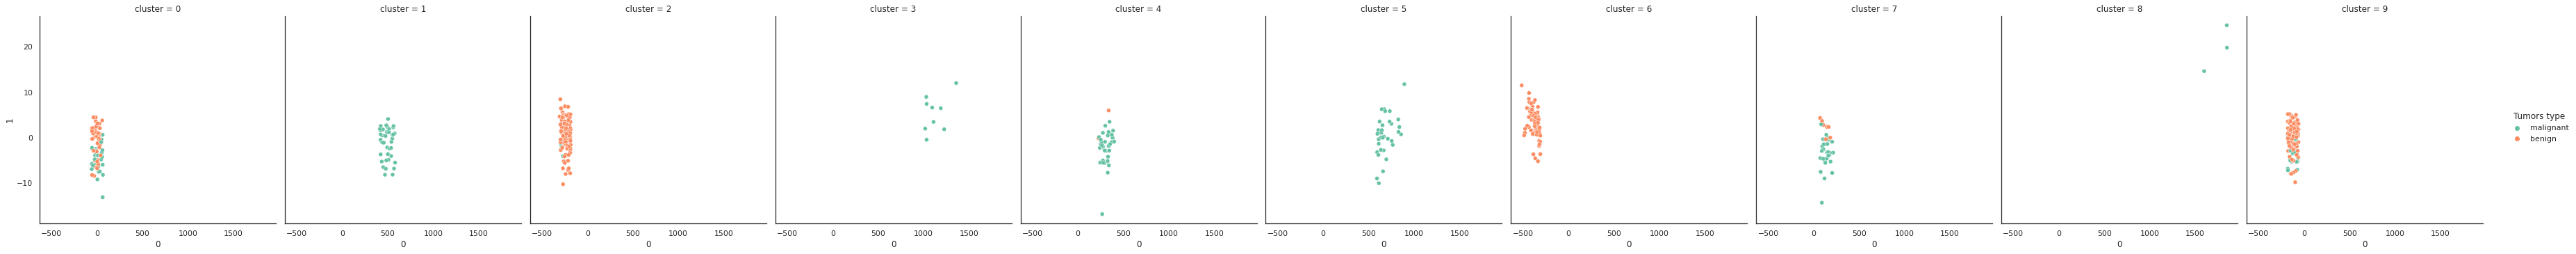

In [451]:
sns.relplot(data=reduce_df, x=0,y=1, hue=reduce_df["Tumors type"] , col="cluster")

In [456]:
kmeans.inertia_

1188066.6826722343

In [459]:
inertia_list = []
for k in range(1, 10):
    kmeans=sklearn.cluster.KMeans(k)
    kmeans=kmeans.fit(X)
    inertia_list +=[kmeans.inertia_]

In [460]:
inertia_list

[70687559.34028472,
 21256757.15785492,
 13177576.957792219,
 7437992.795617598,
 4968202.146145978,
 3615993.7719177688,
 2632861.87978545,
 1914482.2208150057,
 1482975.0168089422]

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

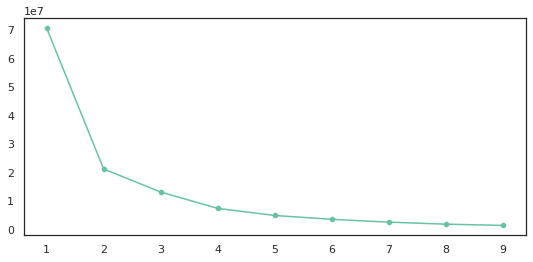

In [462]:
sns.scatterplot(x=np.arange(1, 10), y=inertia_list)
sns.lineplot(x=np.arange(1, 10), y=inertia_list)
sns.despine